# LIBRARIES

In [202]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.math as tfm
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

import random
from sklearn.metrics import confusion_matrix

# DATA

In [181]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [182]:
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label: \n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [183]:
print(train_data[0].shape, '\n')
print(train_labels[0].shape)

(28, 28) 

()


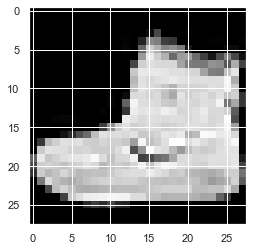

In [184]:
plt.imshow(train_data[0], cmap='gray');

In [185]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
                'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(len(class_names))

10


Text(0.5, 1.0, 'T-shirt/top')

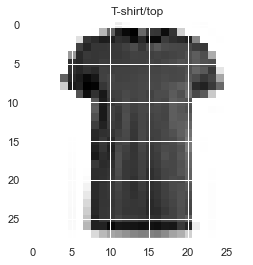

In [186]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

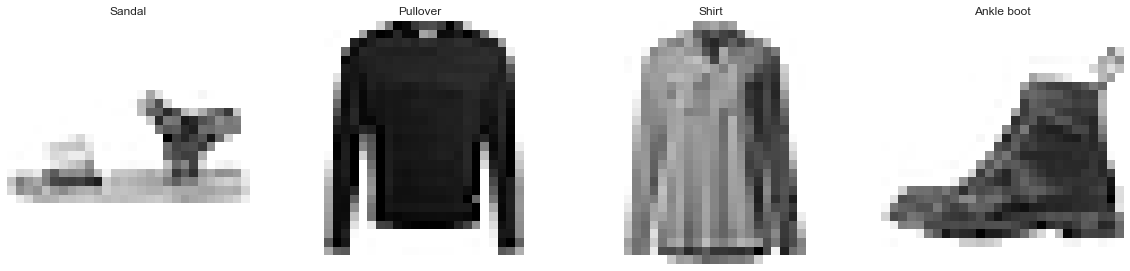

In [187]:
plt.figure(figsize=(20, 20))

for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [188]:
tf.random.set_seed(42)

model_11 = tfk.Sequential([
    tfk.layers.Flatten(input_shape=(28, 28)),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(10, activation='softmax')
])

model_11.compile(   loss=tfk.losses.SparseCategoricalCrossentropy(),
                    optimizer=tfk.optimizers.Adam(),
                    metrics=['accuracy']    )

non_norm_history = model_11.fit(    train_data, train_labels, epochs=10,
                                    validation_data=(test_data, test_labels)    )

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 2s 838us/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 2s 866us/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 2s 970us/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 2s 928us/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_a

In [189]:
model_11.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_91 (Dense)            (None, 4)                 3140      
                                                                 
 dense_92 (Dense)            (None, 4)                 20        
                                                                 
 dense_93 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [190]:
train_data.min(), train_data.max()

(0, 255)

# NORMALIZE

In [191]:
train_data_norm = train_data / 255.0
test_data_norm  = test_data  / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [192]:
tf.random.set_seed(42)

model_12 = tfk.Sequential([
    tfk.layers.Flatten(input_shape=(28, 28)),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(10, activation='softmax')
])

model_12.compile(   loss=tfk.losses.SparseCategoricalCrossentropy(),
                    optimizer=tfk.optimizers.Adam(),
                    metrics=['accuracy']    )

norm_history = model_12.fit(train_data_norm, train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 954us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

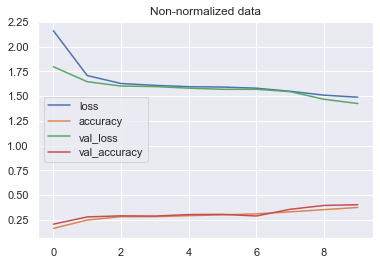

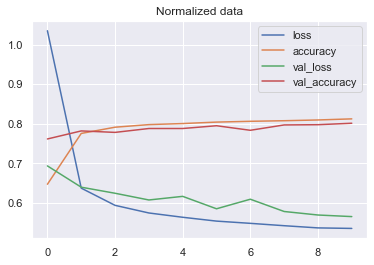

In [193]:
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data');
pd.DataFrame(norm_history    .history).plot(title='Normalized data');

# LEARNING RATE

In [194]:
tf.random.set_seed(42)

model_13 = tfk.Sequential([
    tfk.layers.Flatten(input_shape=(28, 28)),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(10, activation='softmax')
])

model_13.compile(   loss=tfk.losses.SparseCategoricalCrossentropy(),
                    optimizer=tfk.optimizers.Adam(),
                    metrics=['accuracy']    )

lr_scheduler = tfk.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit( train_data_norm, train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler]    )

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 823us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 834us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 831us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 908us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 877us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==========================

KeyboardInterrupt: 

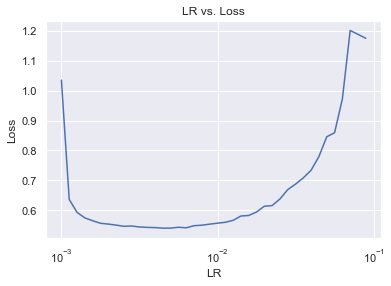

In [ ]:
lrs = 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('LR')
plt.ylabel('Loss')
plt.title('LR vs. Loss');

In [ ]:
tf.random.set_seed(42)

model_14 = tfk.Sequential([
    tfk.layers.Flatten(input_shape=(28, 28)),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(4,  activation='relu'),
    tfk.layers.Dense(10, activation='softmax')
])

model_14.compile(   loss=tfk.losses.SparseCategoricalCrossentropy(),
                    optimizer=tfk.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy']    )

history_14 = model_14.fit(  train_data_norm, train_labels,
                            epochs=20,
                            validation_data=(test_data_norm, test_labels)   )

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# EVALUATING

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set( title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes), # create enough axis slots for each class
          yticks=np.arange(n_classes), 
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text( j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
print(test_data[0], '\n')
print(test_data_norm[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

In [ ]:
y_probs = model_14.predict(test_data_norm)

print(tf.round(y_probs), '\n')
print(y_probs, '\n')
print(tf.round(y_probs[0]), '\n')
print(y_probs[0], '\n')

tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 10), dtype=float32) 

[[8.56299823e-11 3.53617689e-13 2.66337320e-05 ... 9.18690339e-02
  4.06050868e-03 8.07873726e-01]
 [3.42786211e-06 1.28992159e-16 9.59891498e-01 ... 1.13832739e-28
  6.32725889e-04 4.47891289e-08]
 [6.10627103e-05 9.96576726e-01 4.38664749e-08 ... 7.32363380e-18
  5.48108723e-08 4.92243880e-14]
 ...
 [7.85796121e-02 2.22948838e-05 1.40334085e-01 ... 2.95339215e-20
  1.11972310e-01 4.76000706e-09]
 [3.31111842e-05 9.93013084e-01 2.33923998e-07 ... 9.39861490e-15
  8.15926228e-07 1.21589735e-11]
 [7.98162745e-08 7.75784548e-10 1.64706595e-04 ... 4.38262783e-02
  1.51625474e-03 3.91205586e-02]] 

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32) 

[8.5629982e-11 3.5361769e-13 2.6633732e-05 4.6356295e-08 5.0949817e-05
 9.6118927e-02 8.1778047e-08 9.1869034e-02 4.06050

In [ ]:
y_preds = y_probs.argmax(axis=1)

print(y_preds, '\n')
print(y_preds[:10])

[9 2 1 ... 3 1 5] 

[9 2 1 1 6 1 4 6 5 7]


In [ ]:
print(confusion_matrix(y_true=test_labels, y_pred=y_preds))

[[696   8  25  87   9   5 160   0  10   0]
 [  2 939   2  35   9   0  13   0   0   0]
 [ 19   2 656  10 188   0 110   0  15   0]
 [ 39  10  10 819  55   0  47   1  19   0]
 [  0   0  95  23 800   0  73   0   7   2]
 [  0   0   1   0   0 894   0  60   7  38]
 [106   4 158  57 159   1 499   0  16   0]
 [  0   0   0   0   0  31   0 936   0  33]
 [  4   1  38  15   8  12   9   5 906   2]
 [  0   0   1   0   2  15   0  51   1 930]]


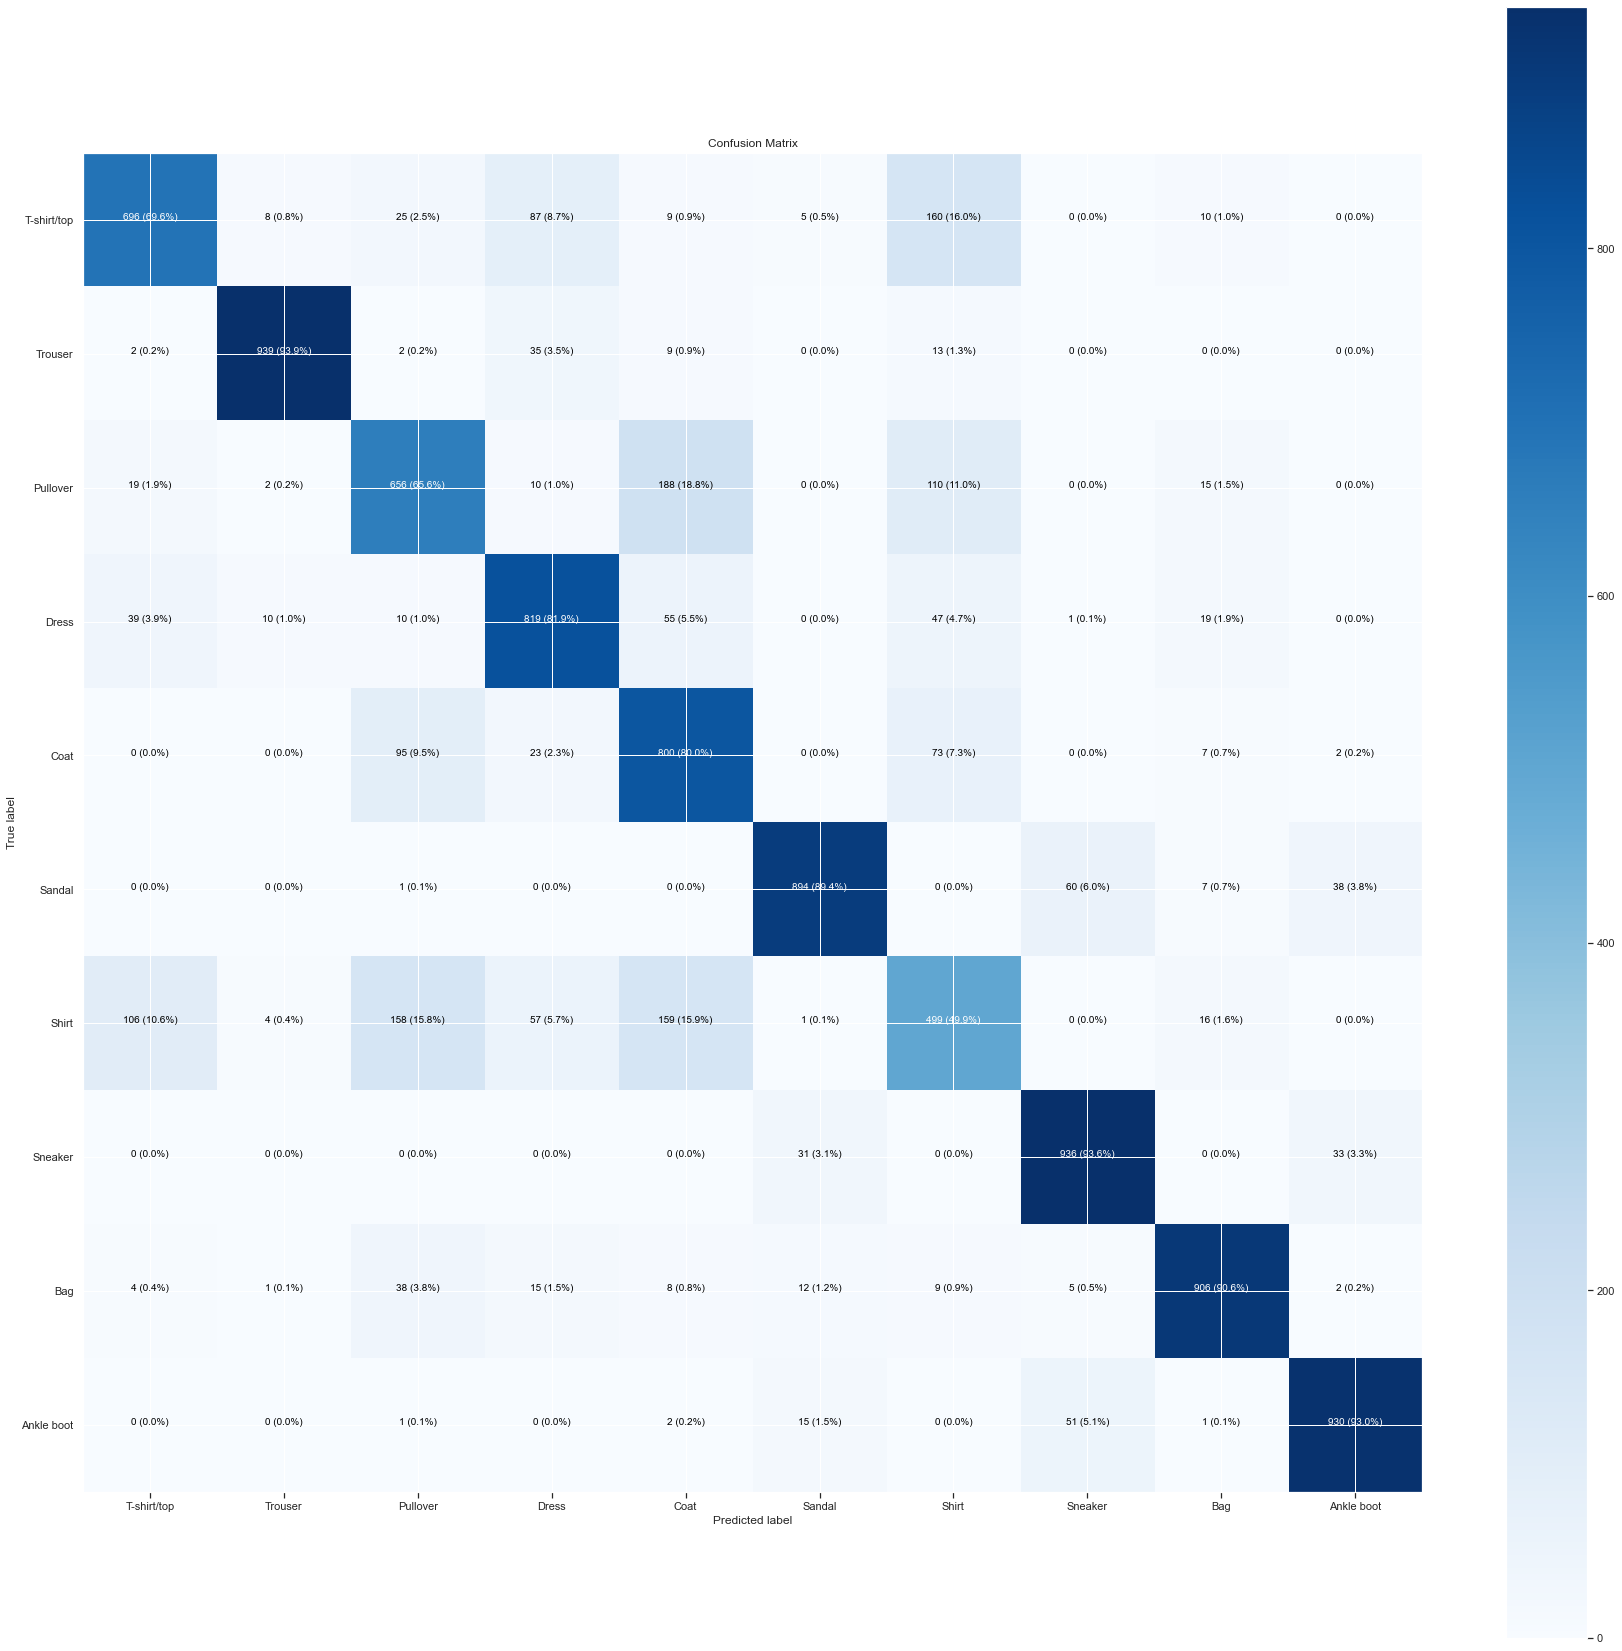

In [ ]:
make_confusion_matrix(  y_true=test_labels,
                        y_pred=y_preds,
                        classes=class_names,
                        figsize=(30, 30),
                        text_size=10    )

# PREDICTIONS

In [ ]:
def plot_random_image(model, images, true_labels, classes):
    """ Picks a random image, plots it & labels it with a prediction and truch label """
    i = random.randint(0, len(images))
    
    target_image = images[i]
    pred_probs   = model.predict(target_image.reshape(1, 28, 28))
    pred_label   = classes[pred_probs.argmax()]
    true_label   = classes[true_labels[i]]
    
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if (pred_label == true_label):
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_probs):.2f}% (True: {true_label})',
                color=color)


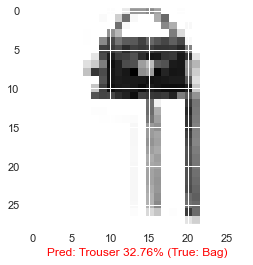

In [ ]:
plot_random_image(  model=model_14, images=test_data_norm, true_labels=test_labels,
                    classes=class_names )

# PATTERNS

In [196]:
model_14.layers

In [198]:
# Extract a particular layer
model_14.layers[1]

In [200]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
print(weights, '\n')
print(weights.shape, '\n')
print(biases, '\n')
print(biases.shape)

[[ 0.7150266  -0.06077086 -0.9976308  -1.0484312 ]
 [ 0.27732116 -0.47155362 -0.5291646   0.02329238]
 [ 0.7752429   0.54027545 -1.1288568  -0.74261546]
 ...
 [-0.39453447  0.47628677 -0.22641525  0.25505912]
 [-0.40515828  0.61810106  0.23928423 -0.5038759 ]
 [ 0.23884551  0.11606929 -0.12131333  0.04352404]] 

(784, 4) 

[ 2.4486070e-02 -6.1512832e-04 -2.7230212e-01  8.1124848e-01] 

(4,)


In [201]:
model_14.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 4)                 3140      
                                                                 
 dense_89 (Dense)            (None, 4)                 20        
                                                                 
 dense_90 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


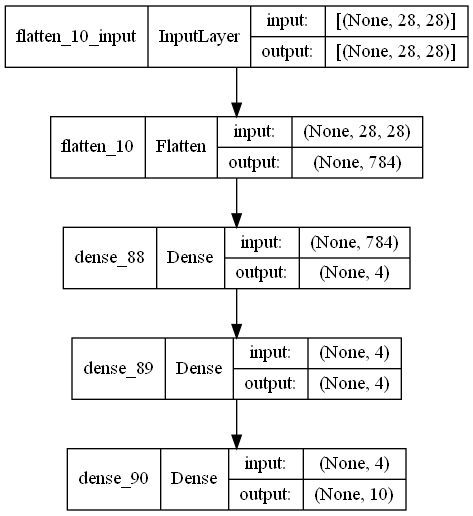

In [203]:
plot_model(model_14, show_shapes=True)